In [1]:
# импорт модулей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Гамма распределение

In [25]:
distribution = sts.gamma(1, 2) # выбираем распределение

In [26]:
 x = np.linspace(distribution.ppf(0.0001), distribution.ppf(0.9999), 1000)   # область значений

In [27]:
sample = distribution.rvs(1000) # делаем выборку

In [28]:
pdf = distribution.pdf(x) # плотноть вероятности

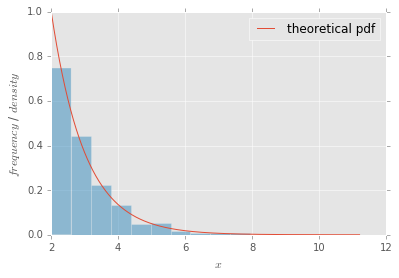

In [29]:
# построение теоретического распределения и гистограммы
plt.figure()
plt.style.use('ggplot') # стиль графиков, как в ggplot
plt.plot(x, pdf, label='theoretical pdf', alpha=5)
plt.hist(sample, normed = True, alpha = 0.5)
plt.ylim(0,1)
plt.legend()
plt.ylabel('$frequency$ / $density$')
plt.xlabel('$x$')
plt.show()

# Оценка среднего по ЦПТ

In [46]:
# определим ф-цию, которая берет 1000 раз выборку размером n из распределения и находит среднее, затем отрисовывает графики
def f(x, distribution, n):
    y = []
    for i in range(1000):
        sample = distribution.rvs(n)
        y.append(sample.mean())  
    y = np.array([y])
    df = pd.DataFrame(y.T)
    df.columns = ['Mean']
    #return df
    
    norm = sts.norm(distribution.mean(), np.sqrt(distribution.var()/n)) # приближающее нормальное распределение
    x = np.linspace(norm.ppf(0.0001), norm.ppf(0.9999), 1000) 
    pdf  = norm.pdf(x) 
    plt.figure()
    plt.style.use('ggplot') # стиль графиков, как в ggplot
    plt.plot(x, pdf, label='theoretical pdf', alpha=5)
    plt.hist(df.Mean, normed =True, label = "Means hist(n=%s)" % n)
    plt.legend()
    plt.ylabel('$frequency$ / $density$')
    plt.xlabel('$x$')
    plt.show()
    
    print 'Mean: ' 'E=%s' %distribution.mean()
    print 'Var: '  'D=%s' %round(np.sqrt(distribution.var()/n),3)

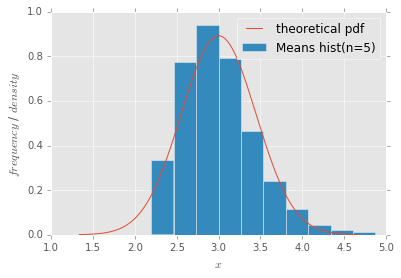

Mean: E=3.0
Var: D=0.447


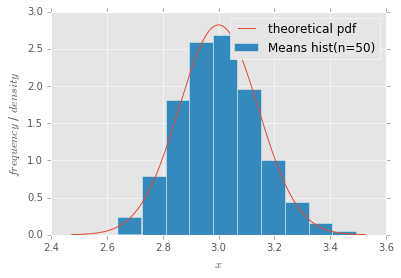

Mean: E=3.0
Var: D=0.141


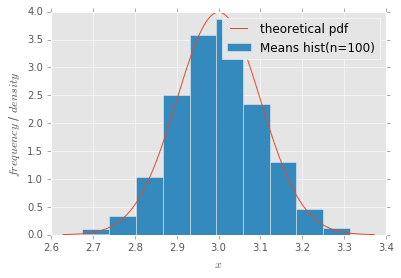

Mean: E=3.0
Var: D=0.1


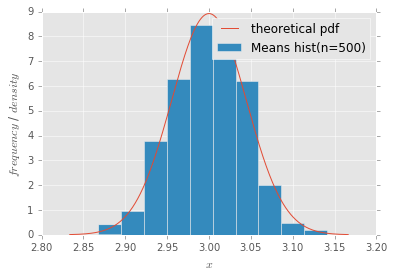

Mean: E=3.0
Var: D=0.045


In [48]:
# применяем ф-цию для 5, 50, 100, 500
f(x, distribution, 5)
f(x, distribution, 50)
f(x, distribution, 100)
f(x, distribution, 500)

Как видно на графиках выше, с ростом размера выборки снижается дисперсия оценки среднего значения. Следовательно, чем больше выборка, тем точнее оценка среднего по ней.